# Pretrained models

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
input_path = '../data/generator/class 0/squirrel.jpeg'

In [9]:
img = image.load_img(input_path, target_size=(224, 224))

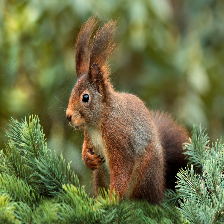

In [10]:
img

In [11]:
img_array = image.img_to_array(img)

In [12]:
img_array.shape

(224, 224, 3)

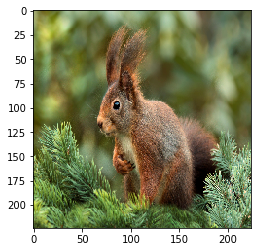

In [13]:
plt.imshow(img_array.astype('uint8'))

In [14]:
img_tensor = np.expand_dims(img_array, axis=0)

In [15]:
img_tensor.shape

(1, 224, 224, 3)

## Predict class with pre-trained resnet50

In [16]:
from tensorflow.keras.applications.resnet50 import preprocess_input as ppr50

In [17]:
img_ppr50 = np.copy(img_tensor)
img_ppr50 = ppr50(img_ppr50)

In [18]:
img_ppr50[0].shape

(224, 224, 3)

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions as dpr50

model = ResNet50(weights='imagenet')

In [20]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
preds = model.predict(img_ppr50)

In [22]:
preds.shape

(1, 1000)

In [23]:
dpr50(preds, top=3)[0]

[('n02356798', 'fox_squirrel', 0.5865199),
 ('n01877812', 'wallaby', 0.14074114),
 ('n02326432', 'hare', 0.0925801)]

## Exercise 1:

Use a different pre-trained model from the ones provided at:

https://keras.io/applications/

to predict the same image. Do the predictions match?

## Exercise 2:

Retry this code on a different image.

- Download an image from the web
- Upload the image through the jupyter home page
- change the `input_path` path variable above to point to your new image
- re-run the notebook to see if the pre-trained model can guess your image